# Capitulo 2. Proyecto de Machine Learning

👀: verifica que si hayas instalado las librerías que vas a necesitar

En este caso se realizará un modelo para predecir la media de precios en las viviendas de los diferentes municipos de Londres, Reino Unido 🇬🇧.

## <span style="color:green">1. Descargar los datos</span>

Las bases de datos para este proyecto se puede encontrar en este enlace: https://www.kaggle.com/justinas/housing-in-london

También se pueden consultar todas las bases de datos de este curso en GitHub:https://github.com/a2Proyectos/MachineLearning_Data

- housing_in_london_yearly_variables.csv, con los datos que necesitamos para hacer la regresión.
- London_Borough_Excluding_MHW.shp, con los datos que necesitamos para graficar Londres.
- Capitulo_2/housing_in_london_monthly_variables.csv, con los datos de la media salarial

In [1]:
## Importamos libreriaas de las aplicaciones
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
## Definimos una función para extraer datos.
#DOWNLOAD_ROOT es la base del GitHub donde vamos a estar descargando las bases de datos.
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/a2Proyectos/MachineLearning_Data/main/"
#Complementos con la dirección especifica de la base de datos que queremos.
LONDON_SALARY = "Capitulo_2/housing_in_london_yearly_variables.csv"
LONDON_HOUSING = "Capitulo_2/housing_in_london_monthly_variables.csv"
LONDON_MAP = os.path.abspath("") + "\map\London_Borough_Excluding_MHW.shp"


def extraer_datos(root,database):
    csv_path = root + database
    return pd.read_csv(csv_path)


***

## <span style="color:green">2. Vistazo a la Base de Datos</span>

In [6]:
## Juntamos nuestra base de datos de la media salarial, con la de datos de Londres.
df1 = extraer_datos(DOWNLOAD_ROOT, LONDON_SALARY)
df2 = extraer_datos(DOWNLOAD_ROOT, LONDON_HOUSING)
df1.head()

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999-12-01,33020.0,NaN,48922,0,6581.0,NaN,NaN,NaN,1
1,E09000002,barking and dagenham,1999-12-01,21480.0,NaN,23620,3,162444.0,NaN,NaN,NaN,1
2,E09000003,barnet,1999-12-01,19568.0,NaN,23128,8,313469.0,NaN,NaN,NaN,1
3,E09000004,bexley,1999-12-01,18621.0,NaN,21386,18,217458.0,NaN,NaN,NaN,1
4,E09000005,brent,1999-12-01,18532.0,NaN,20911,6,260317.0,NaN,NaN,NaN,1


In [8]:
#Filtrar los datos 
df1 = df1.filter(items=["median_salary","area","date"])
df1.head()

,median_salary,area,date
0,33020.0,city of london,1999-12-01
1,21480.0,barking and dagenham,1999-12-01
2,19568.0,barnet,1999-12-01
3,18621.0,bexley,1999-12-01
4,18532.0,brent,1999-12-01


In [10]:
#Fusionar los dos dataframe
data = pd.merge(df1,df2)
data.head()

,median_salary,area,date,average_price,code,houses_sold,no_of_crimes,borough_flag
0,33020.0,city of london,1999-12-01,169309,E09000001,97.0,NaN,1
1,21480.0,barking and dagenham,1999-12-01,68812,E09000002,267.0,NaN,1
2,19568.0,barnet,1999-12-01,149510,E09000003,619.0,NaN,1
3,18621.0,bexley,1999-12-01,93905,E09000004,460.0,NaN,1
4,18532.0,brent,1999-12-01,123398,E09000005,395.0,NaN,1


In [11]:
# Obtener información de los datos.
"population_size","life_satisfaction","number_of_houses"
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903 entries, 0 to 902
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   median_salary  881 non-null    float64
 1   area           903 non-null    object 
 2   date           903 non-null    object 
 3   average_price  903 non-null    int64  
 4   code           903 non-null    object 
 5   houses_sold    860 non-null    float64
 6   no_of_crimes   617 non-null    float64
 7   borough_flag   903 non-null    int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 63.5+ KB


👀:Comienza a ver el tipo de variable, de eso depende el análisis que le demos o si necesitamos cambiarlas a otro tipo de variable

***

In [12]:
# Una forma muy común para saber que tipo de datos contiene alguna variable de tipo objeto, es contar sus valores, ejemplo:
data["area"].value_counts()

city of london            21
westminster               21
newham                    21
redbridge                 21
richmond upon thames      21
southwark                 21
sutton                    21
tower hamlets             21
waltham forest            21
wandsworth                21
north east                21
lewisham                  21
north west                21
east midlands             21
west midlands             21
london                    21
south east                21
south west                21
inner london              21
outer london              21
merton                    21
lambeth                   21
barking and dagenham      21
greenwich                 21
barnet                    21
bexley                    21
brent                     21
bromley                   21
camden                    21
croydon                   21
ealing                    21
enfield                   21
hackney                   21
kingston upon thames      21
hammersmith an

In [13]:
# Una forma muy utilizada para obtener información de nuestros datos numéricos es el método describe(), ejemplo:
pd.options.display.float_format = '{:,.2f}'.format
data.describe()

,median_salary,average_price,houses_sold,no_of_crimes,borough_flag
count,881.00,903.00,860.00,617.00,903.00
mean,"28,789.28","309,916.87","3,853.29","2,038.09",0.77
std,"6,508.32","187,527.43","12,917.66",879.52,0.42
min,"15,684.00","48,298.00",6.00,0.00,0.00
25%,"24,582.00","189,287.00",246.00,"1,542.00",1.00
50%,"28,284.00","260,893.00",351.00,"2,008.00",1.00
75%,"31,589.00","387,597.00",626.00,"2,402.00",1.00
max,"61,636.00","1,364,185.00","119,458.00","7,461.00",1.00


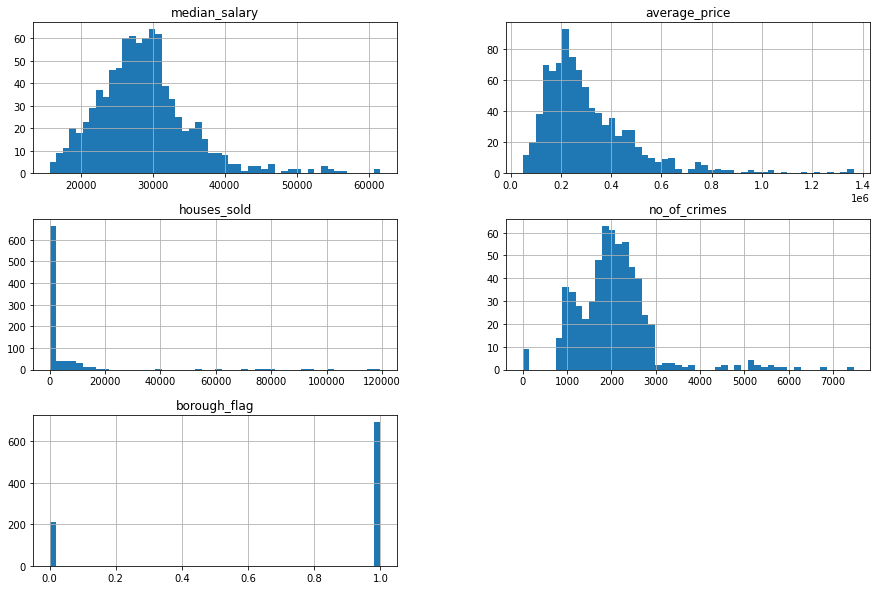

In [14]:
# Realiza un Histograma para visualizar los datos 
#matplotlib inline para aquellos que estan con jupyter notebook
data.hist(bins=50,figsize=(15,10))
plt.show()

***

## <span style="color:green">3. Crear un set de entrenamiento y de prueba </span>

Recuerden que nuestro set de prueba lo pondremos de lado por ahora, sin verlo. No sean tramposos ❌

In [16]:
#Importamos la función para dividir los datos train_test_split
from sklearn.model_selection import train_test_split

In [17]:
# Seleccionamos por ejemplo, el 30% de los datos para el set de prueba
#Random_state es la semilla que se usa para generar números aleatorios.
set_ent, set_prueba = train_test_split(data, test_size=0.3, random_state=45)

In [18]:
#confirmamos la división
print(len(set_ent),len(set_prueba))

632 271


Ya tenemos nuestro set de prueba y nuestro set de entrenamiento ✅

***

### <span style="color:blue">3.1 Evitar Sesgo </span>

<AxesSubplot:>

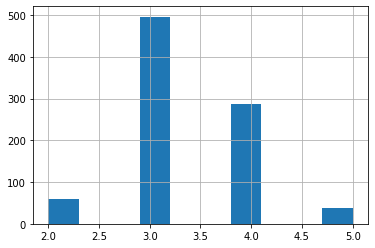

In [19]:
# Para categorizar una variable, ejemplo con 5 niveles. 
data["salary_cat"] = pd.cut(data["median_salary"],
                           bins=[0., 10000, 20000, 30000, 40000,
                                np.inf],
                           labels=[1, 2, 3, 4, 5])
#Hacer un histograma de las categorías
data["salary_cat"].hist()

In [20]:
#Verificar que no existen datos en el bin #1
data["salary_cat"].value_counts()

3    496
4    287
2     59
5     39
1      0
Name: salary_cat, dtype: int64

<AxesSubplot:>

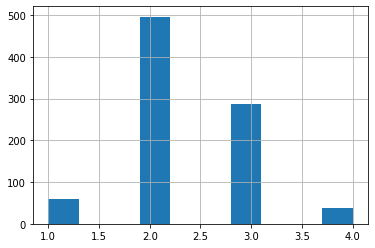

In [21]:
# Redefinir en 4 categorías, quitando en donde no hay datos (el bin#1)
data = data.dropna(subset=['median_salary'])
data = data.reset_index()
data["salary_cat"] = pd.cut(data["median_salary"],
                           bins=[10000., 20000., 30000., 40000.,
                                np.inf],
                           labels=[1, 2, 3, 4])
data["salary_cat"].hist()

In [12]:
#Verifica que si se redefinieron las categorías 
data["salary_cat"].value_counts()

2    496
3    287
1     59
4     39
Name: salary_cat, dtype: int64

In [22]:
## Dividir datos basándonos en nuestras categorías de salarios

from sklearn.model_selection import StratifiedShuffleSplit

In [23]:
# Generamos nuestro objeto para que lo divida en 30% y solo haga una división
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=45)

In [24]:
# Creamos nuestras variables basándonos en nuestras categorías
for ent_index, prueba_index in split.split(data,data["salary_cat"]):
    cat_set_ent = data.loc[ent_index]
    cat_set_prueba = data.loc[prueba_index]

In [27]:
# Comprobación. Ya en porcentaje
cat_set_prueba["salary_cat"].value_counts()/ len(cat_set_prueba)

2   0.56
3   0.32
1   0.07
4   0.05
Name: salary_cat, dtype: float64

***

In [29]:
# Creamos dataframe para trabajar con el set de entrenamiento
df = cat_set_ent.copy()
df.head()

,index,median_salary,area,date,average_price,code,houses_sold,no_of_crimes,borough_flag,salary_cat
323,336,"21,946.00",east midlands,2006-12-01,151841,E12000004,"10,413.00",NaN,0,2
424,438,"28,234.00",ealing,2009-12-01,279575,E09000009,312.00,"2,392.00",1,2
560,574,"28,326.00",havering,2012-12-01,223743,E09000016,231.00,"1,452.00",1,2
481,495,"30,806.00",lewisham,2010-12-01,223141,E09000023,242.00,"2,119.00",1,3
53,55,"25,264.00",hammersmith and fulham,2000-12-01,262106,E09000013,255.00,NaN,1,2


***

## <span style="color:green">4. Visualizar los Datos Gráficamente </span>


Para esto vamos a necesitar, en conjunto con nuestro dataset LONDON_MAP, una nueva libreria que se llama geopandas, el cual exteiende la libreria pandas, para trabajar con datos geoespaciales, se puede encontrar más información en: https://geopandas.org/getting_started/introduction.html

In [1]:
#Importar geopandas
import geopandas as gpd

#Leer el mapa
londres_map = gpd.read_file(LONDON_MAP)
londres_map.head()

In [2]:
# Graficamos el mapa
londres_map.plot()

***

In [18]:
# Ajustamos los nombres de las columnas para despúes hacer un merge.
#utilizar lower para cambiar de mayúsculas a minúsculas 
londres_map.columns = londres_map.columns.str.lower()
londres_map = londres_map.rename({'name': 'area', 'gss_code': 'code'}, axis=1)
londres_map["area"] = londres_map["area"].str.lower()


#Seleccionar columnas necesarias
londres_map = londres_map.filter(items=["area","code","hectares","geometry"])
londres_map.head()

,area,code,hectares,geometry
0,kingston upon thames,E09000021,"3,726.12","POLYGON ((516401.600 160201.800, 516407.300 16..."
1,croydon,E09000008,"8,649.44","POLYGON ((535009.200 159504.700, 535005.500 15..."
2,bromley,E09000006,"15,013.49","POLYGON ((540373.600 157530.400, 540361.200 15..."
3,hounslow,E09000018,"5,658.54","POLYGON ((521975.800 178100.000, 521967.700 17..."
4,ealing,E09000009,"5,554.43","POLYGON ((510253.500 182881.600, 510249.900 18..."


***

In [19]:
# Seleccionar datos de nuestro set de entrenamiento
df_m = df.groupby('area').agg({'average_price': ['mean'], 'houses_sold': 'sum'})

# Le asignamos nombre a las columnas del nuevo dataframe y reseteamos el indice
df_m.columns = ['average_price', 'houses_sold']
df_m.reset_index(inplace = True)
df_m.head()

,area,average_price,houses_sold
0,barking and dagenham,"195,200.62","3,263.00"
1,barnet,"336,594.69","6,852.00"
2,bexley,"210,629.00","3,275.00"
3,brent,"337,881.92","2,785.00"
4,bromley,"269,082.50","6,076.00"


In [20]:
# Combinar dtaframes
londres_map = pd.merge(londres_map,df_m,on="area")
londres_map.head()

,area,code,hectares,geometry,average_price,houses_sold
0,kingston upon thames,E09000021,"3,726.12","POLYGON ((516401.600 160201.800, 516407.300 16...","310,143.67","3,486.00"
1,croydon,E09000008,"8,649.44","POLYGON ((535009.200 159504.700, 535005.500 15...","239,681.71","6,582.00"
2,bromley,E09000006,"15,013.49","POLYGON ((540373.600 157530.400, 540361.200 15...","269,082.50","6,076.00"
3,hounslow,E09000018,"5,658.54","POLYGON ((521975.800 178100.000, 521967.700 17...","272,294.59","4,342.00"
4,ealing,E09000009,"5,554.43","POLYGON ((510253.500 182881.600, 510249.900 18...","358,431.50","3,322.00"


***

(500648.7349999999, 564876.965, 153596.645, 203188.055)

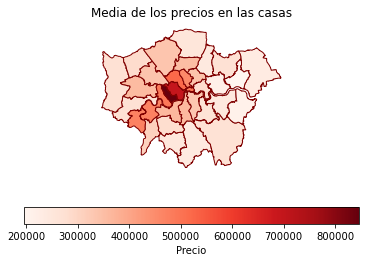

In [21]:
#Gráfica del promedio de los precios en las casas 
#Cuando se grafica en geopandas hay muchos argumentos, no se desesperen si no los recuerdan, es normal. 
plt = londres_map.plot(column = 'average_price', cmap = 'Reds', edgecolor = 'maroon',
               legend = True, legend_kwds = {'label': 'Precio', 'orientation' : 'horizontal'})
plt.set_title('Media de los precios en las casas')
plt.axis('off')

💸: Recuerden que los precios son mayores en el centro de la cuidad

(500648.7349999999, 564876.965, 153596.645, 203188.055)

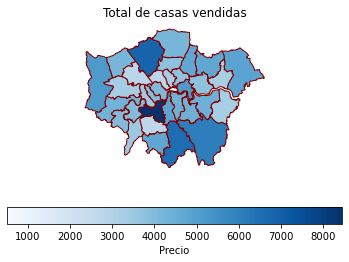

In [22]:
#Graficar ahora el total de las casa vendidas (utilizar el código anterior para no repetir)
plt = londres_map.plot(column = 'houses_sold', cmap = 'Blues', edgecolor = 'maroon',
               legend = True, legend_kwds = {'label': 'Precio', 'orientation' : 'horizontal'})
plt.set_title('Total de casas vendidas')
plt.axis('off')

**Ejercicio:** Incluir en el análisis los salarios promedio por zona (apoyarse del video 21)

***

## <span style="color:green">5. Medir la Correlación </span>


In [23]:
# Crear matriz de correlación
matriz = df.corr(method='pearson')

# Comparar correlación
matriz["average_price"].sort_values(ascending=False)

average_price        1.00
median_salary        0.63
borough_flag         0.33
no_of_crimes         0.23
life_satisfaction    0.07
index               -0.18
population_size     -0.19
houses_sold         -0.20
Name: average_price, dtype: float64

<AxesSubplot:>

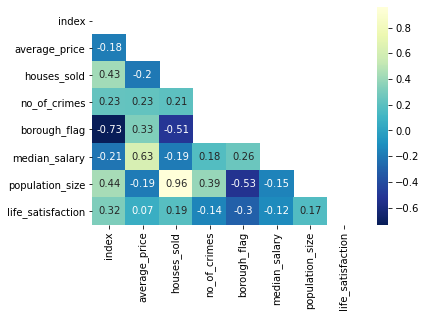

In [24]:
#Importar seaborn 
import seaborn as sns

# Crear vector
mask = np.triu(np.ones_like(matriz, dtype = bool))

# Graficar
plt = sns.heatmap(matriz, mask = mask, annot = True, cmap = 'YlGnBu_r')
plt

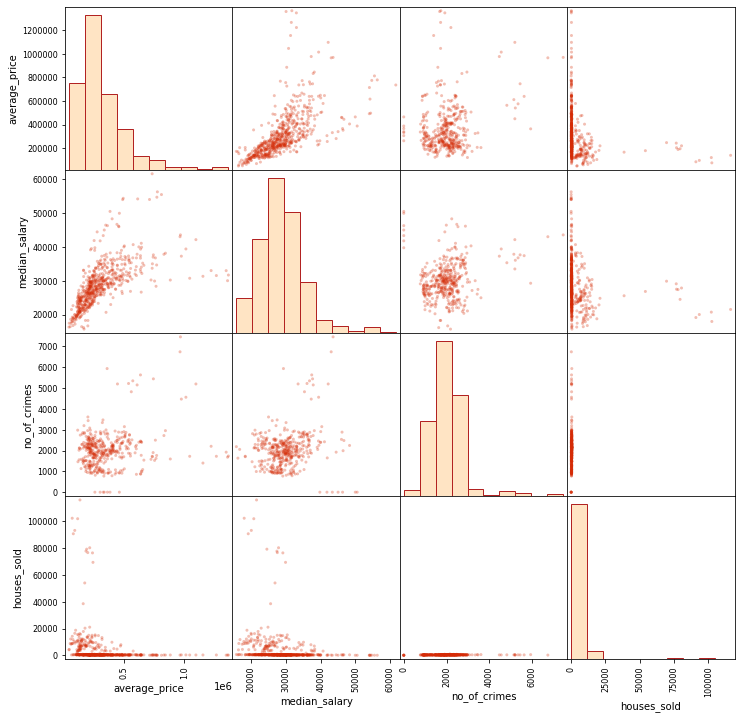

In [25]:
#Importar pandas 
from pandas.plotting import scatter_matrix

#Para graficar scatter_matrix...
columns = ['average_price', 'median_salary', 'no_of_crimes', 'houses_sold']
scatter_matrix(df[columns], figsize = (12, 12), color = '#D52B06', alpha = 0.3, 
               hist_kwds = {'color':['bisque'], 'edgecolor': 'firebrick'});


<AxesSubplot:xlabel='average_price', ylabel='median_salary'>

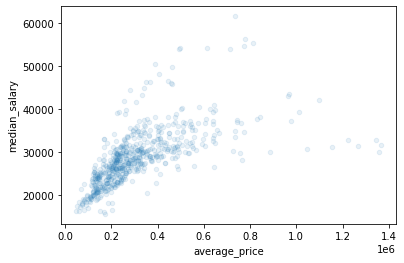

In [26]:
#Por si quieren ver una gráfica en específico más a detalle
df.plot(kind="scatter",y="median_salary",x="average_price",alpha=0.1)

***

## <span style="color:green">6. Combinación de Variables </span>


In [27]:
#Armar una columna para hacer las combinaciones que necesitamos
df["vendidas_poblacion"] = df["population_size"] / df["houses_sold"]
# Crear matriz de correlación
matriz = df.corr(method='pearson')
matriz["average_price"].sort_values(ascending=False)

average_price         1.00
median_salary         0.63
borough_flag          0.33
vendidas_poblacion    0.28
no_of_crimes          0.23
life_satisfaction     0.07
index                -0.18
population_size      -0.19
houses_sold          -0.20
Name: average_price, dtype: float64

***

***

## <span style="color:Blue">7. Transformación de Datos </span>


In [28]:
# Crear Dataframe de predictores y variable a predecir ✂️
df_label = cat_set_ent['average_price']
#Nuevo dataframe sin average_price
df = cat_set_ent.drop('average_price', axis=1)
df.head()

***

In [ ]:
#Darte una idea de a qué variables le hace faltan datos
df.info()
#Calcular la suma de todos los vacíos  
df.isna().sum()

In [ ]:
#Quitar el número de crímenes por su alta cantidad de datos vacíos 
df=df.drop("no_of_crimes", axis=1) 

In [29]:
#Tomamos la media 
median = df["houses_sold"].median()
#Llenamos los valores con la media
df['houses_sold'].fillna(median,inplace=True)  #opción 3
#Verifica que no hay datos vacíos
df.isna().sum()

***

Recuerden que volvimos a ejecutar la línea de código de "df = cat_set_ent.drop('average_price', axis=1)" para hacer este ejercicio

In [30]:
#BIENVENIDOS A SCIKIT <3 Serán unos expertos al final. 
# Rellenar valores con scikit
#1. Recuerden: importar lo que vayas a utiliza, en este caso SimpleImputer
from sklearn.impute import SimpleImputer

# 2. Crear objeto, en este caso se llamará imputer
imputer = SimpleImputer(strategy="median")

df.isna().sum()
df= df.drop(["no_of_crimes"],axis=1)
df.info()

# data numérico
df_num = df.drop(["area","date","code"],axis=1)

#Ejecuta Imputer
imputer.fit(df_num)

#Aplicar transform para rellenar las medianas 
X = imputer.transform(df_num)

#Regresarlo a dataframe 
df_tr = pd.DataFrame(X, columns=df_num.columns, index=df_num.index)
df_tr.head()

,index,houses_sold,no_of_crimes,borough_flag,median_salary,population_size,life_satisfaction
423,428.00,189.00,949.00,1.00,"27,274.00","154,485.00",7.49
530,538.00,216.00,"1,784.00",1.00,"28,100.00","284,617.00",7.30
705,726.00,"4,968.00","1,998.50",0.00,"29,399.00","4,963,305.00",7.49
262,267.00,187.00,"1,722.00",1.00,"33,688.00","178,365.00",7.56
66,67.00,482.00,"1,482.00",1.00,"22,247.00","220,016.00",7.49


***

## <span style="color:Blue">8. Manejo de texto y valores categóricos </span>

In [32]:
#definir que variable vamos a cambiar a valor numérico
df_cat=df[["area"]]
#Convertir variables de texto en numéricas
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_oe = ordinal_encoder.fit_transform(df_cat)
#verificar que si se haya transformado
df_oe[0:10]

#Por si quieres ver como funciona el encoder
ordinal.encoder.categories_

array([[23.],
       [32.],
       [31.],
       [14.],
       [ 2.],
       [36.],
       [13.],
       [40.],
       [ 0.],
       [ 7.]])

In [33]:
#ONE HOT ENCODER, es importante recordar y entender esta función porque la usaremos en todo el curso
#Convertir variables categóricas en binarias
#Importar OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
#Crear objeto
encoder = OneHotEncoder()
#Ajustar
df_1hot = encoder.fit_transform(df_cat)
#obligar a que nos muestre la matriz 
df_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

***

## <span style="color:Blue">9. Escalación de variables </span>


#### <span style="color:Blue">9.1 Normalización </span>

In [37]:
#Importar MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
#Creamos el objeto 
scaler = MinMaxScaler()
#Hacer un dataframe con la transformación
pd.DataFrame(scaler.fit_transform(prueba),columns=prueba.columns,index=prueba.index)

,col1,col2,col3
0,0.00,0.00,0.00
1,0.11,0.00,0.83
2,0.22,0.50,0.92
3,1.00,1.00,1.00


#### <span style="color:Blue">9.2 Estandarización </span>

In [38]:
## Estandarización (Es el más ultizado)
#Importar StandardScaler (presten especial atención a StandardScaler lo estaremos viendo muy seguido) 
from sklearn.preprocessing import StandardScaler
#Crea objeto
scaler = StandardScaler()
#Hacer un dataframe con la transformación
pd.DataFrame(scaler.fit_transform(prueba),columns=prueba.columns,index=prueba.index)

,col1,col2,col3
0,-0.85,-0.90,-1.71
1,-0.57,-0.90,0.36
2,-0.28,0.30,0.57
3,1.70,1.51,0.78


***

## <span style="color:Blue">10. Pipeline </span>


In [39]:
# Crear función de pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline([("remover",RemoverOutliers()),
                      ("rellenar",SimpleImputer(strategy="median")),
                       ("escalar",StandardScaler())])
pd.DataFrame(pipeline.fit_transform(prueba),columns=prueba.columns,index=prueba.index)

,col1,col2,col3
0,-1.41,-0.90,0.00
1,0.00,-0.90,-1.41
2,1.41,0.30,0.00
3,0.00,1.51,1.41


In [40]:
# Column Transformer (nos permite transformar varias columnas al mismo tiempo y luego juntarlas)
from sklearn.compose import ColumnTransformer
num = list(df_num)
cat = ["area"]

pipeline_completo = ColumnTransformer([
    ("num", pipeline, num),
    ("cat", OneHotEncoder(), cat)
])
#Hacer un datframe que usaremos para la regresión linea
df_preparado = pipeline_completo.fit_transform(df)
#Visualiza los datos 
df_preparado

<616x50 sparse matrix of type '<class 'numpy.float64'>'
	with 4312 stored elements in Compressed Sparse Row format>

***

***

## <span style="color:purple">11. Seleccionar y entrenar modelos </span>

In [41]:
## Hacer Regresión Lineal (AL FIN)
from sklearn.linear_model import LinearRegression
reg_lin = LinearRegression()
reg_lin.fit(df_preparado, df_label)

algunos_datos = df.iloc[:5]
datos_predecir = df_label.iloc[:5]
datos_transformados = pipeline_completo.transform(algunos_datos)
print("Predicción:",reg_lin.predict(datos_transformados))
print("\nOriginales:",list(datos_predecir))

Predicción: [281632.05824791 329634.56384255 298163.31447407 606362.11721413
 109502.04909917]

Originales: [325149, 264683, 260790, 735096, 169878]


In [ ]:
#Análisis preambultario de los errores
algunos_datos=df.iloc[:5]
dato_predecir=df_label.iloc[:5]
datos_transformados=pipeline_completo.transform(algunos_datos)

vp=list(reg_lin.predict(datos_transformados))
vr=list(dato_predecir)

vp=pd.Series(vp)
vr=pd.Series(vr)


abs((vr-vp)/vr).mean()

***

#### <span style="color:purple">11.1 RMSE </span>

In [42]:
# Calcular el promedio de la suma de los errores al cuadrado RMSE
from sklearn.metrics import mean_squared_error
prediccion = reg_lin.predict(df_preparado)
error = mean_squared_error(df_label,prediccion)
error = np.sqrt(error)
error

69648.95465707427

In [ ]:
#Sacar el promedio 
df_label.mean()

In [ ]:
#Calcular el porcentaje de acierto
error/df.label.mean()

***

#### <span style="color:purple">11.2 Árbol de Decisión </span>

In [43]:
# importar DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
#crear objeto 
reg_arbol = DecisionTreeRegressor()
#correrlo
reg_arbol.fit(df_preparado,df_label)
prediccion = reg_arbol.predict(df_preparado)
#calcular el error
error = mean_squared_error(df_label,prediccion)
error = np.sqrt(error)
error

0.0

***

#### <span style="color:purple">11.3 Validación Cruzada </span>

¡Anota esto porque es importante!

In [44]:
#Importar cross_val_score, creo objeto, corro mi función
from sklearn.model_selection import cross_val_score
resultados = cross_val_score(reg_arbol, df_preparado, df_label, scoring="neg_mean_squared_error",cv = 10)
rmse = np.sqrt(-resultados)
rmse

array([ 81152.99900288,  79860.52917703,  80244.29104656,  93073.68206669,
        86437.53162992,  89395.95875915,  65275.6092458 , 101352.52796915,
        77235.11214202,  75021.7125984 ])

In [ ]:
#Calcular el porcentaje de acierto de validación cruzada 
rmse.mean()/df.label.mean()

***

#### <span style="color:purple">11.4 Bosque Aleatorio </span>
¡Este también es importante!

In [45]:
#Importar RandomForestRegressor, creo objeto, corro mi función
from sklearn.ensemble import RandomForestRegressor
reg_forest = RandomForestRegressor()
reg_forest.fit(df_preparado,df_label)
prediccion = reg_forest.predict(df_preparado)

#calcular el error
error = mean_squared_error(df_label,prediccion)
error = np.sqrt(error)
error

24838.769350329345

In [46]:
#Calcular el el promedio de la suma de los errores al cuadrado
resultados = cross_val_score(reg_forest, df_preparado, df_label, scoring="neg_mean_squared_error",cv = 10)
rmse = np.sqrt(-resultados)
rmse

array([47814.09847591, 83134.34275611, 81844.91753033, 81354.22394047,
       75023.99004171, 59732.58011936, 54543.74002162, 77279.76630814,
       73867.61654416, 69911.35928519])

In [ ]:
#Calcular el porcentaje de acierto de bosque aleatorio
rmse.mean()/df.label.mean()

***

## <span style="color:purple">12. Afinar el modelo </span>

### <span style="color:purple">12.1 Grid Search</span>

In [54]:
#Importar GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = [{
    'n_estimators': [3,10,30], 'max_features': [2,4,6,8]
}]
grid_search = GridSearchCV(reg_forest,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(df_preparado,df_label)
#Calcular el mejor parámetro
grid_search.best_params_
#Ver el error
np.sqrt(-grid_search.best_score_)

78449.26669212103

***

### <span style="color:purple">12.2 set de prueba</span>

In [55]:
#¡AHORA SI! A utilizar el set de prueba. Es la última parte 

#Define cuál es el modelo final 
modelo_final = grid_search.best_estimator_

#Aquí definimos cuál será nuestra variable a predecir y las predichas 
Y = cat_set_prueba["average_price"].copy()
X = cat_set_prueba.drop("average_price",axis=1)

#Ahora, sí. El pipeline para limpieza de datos 
X_preparada = pipeline_completo.transform(X)
prediccion_final = modelo_final.predict(X_preparada)

#Por último, ver el error del modelo 
mse_final = mean_squared_error(Y, prediccion_final)
rmse = np.sqrt(-mse_final)
np.sqrt(mse_final)

<ipython-input-55-073897bfe988>:11: RuntimeWarning: invalid value encountered in sqrt
  rmse = np.sqrt(-mse_final)


67974.22116656683

In [ ]:
#Ver el porcentaje de acierto
rmse/Y.mean()